# Linear Regression of MPG Dataset

## Import libraries, check out the data and fix the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_mpg = pd.read_csv("mpg.csv")

In [4]:
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
df_mpg.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
df_mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [8]:
df_mpg = df_mpg.apply(pd.to_numeric, args=('coerce',))

In [9]:
df_mpg['horsepower']=df_mpg['horsepower'].fillna(value=0)

In [10]:
df_mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,0.0
mean,23.514573,5.454774,193.425879,102.894472,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,40.269544,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,NaN
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,NaN


## Create plots to check out the data and its distribution

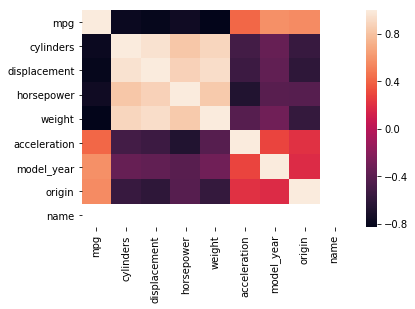

In [11]:
sns.heatmap(df_mpg.corr())

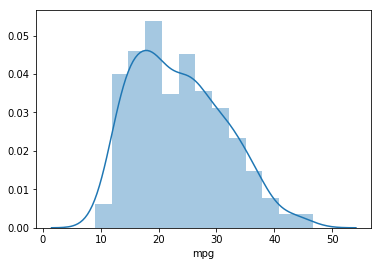

In [12]:
sns.distplot(df_mpg['mpg'])

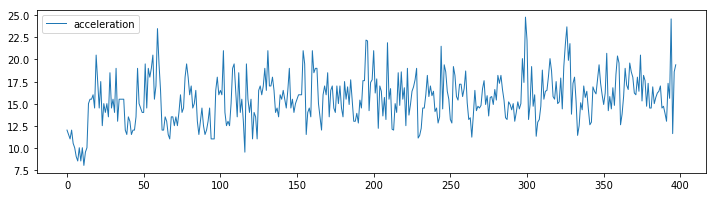

In [33]:
df_mpg.plot.line(x=df_mpg.index,y='acceleration',figsize=(12,3),lw=1)

## Train the linear regression model

We will split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the 'mpg' column. We will toss out columns like name,model_year and origin as they have categorical information that the linear regression model cannot use.

### X and y arrays

In [14]:
X = df_mpg[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = df_mpg['mpg']

## Train Test Split

Splitting the data into a training set and a testing set, training out model on the training set and then using the 
test set to evaluate the model.

In [15]:
from sklearn.model_selection import train_test_split

**Setting test_size=0.4 and random_state=101**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Create and Train the Model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Evaluate the Model

### Print out intercept and coefficients of the model

In [20]:
print(lm.intercept_)

45.62012300104119


In [21]:
df_coefficients = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
df_coefficients

,Coefficient
cylinders,-0.576734
displacement,0.009455
horsepower,-0.038233
weight,-0.006130
acceleration,0.092159


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **cylinders** is associated with a **decrease of 0.576 in mpg**.
- Holding all other features fixed, a 1 unit increase in **displacement** is associated with an **increase of 0.009 in mpg**.
- Holding all other features fixed, a 1 unit increase in **horsepower** is associated with a **decrease of 0.038 in mpg**.
- Holding all other features fixed, a 1 unit increase in **weight** is associated with a **decrease of 0.006 in mpg**.
- Holding all other features fixed, a 1 unit increase in **acceleration** is associated with an **increase of 0.092 in mpg**.

## Predictions from our Model

In [22]:
predictions = lm.predict(X_test)

Text(0,0.5,'Predicted Y')

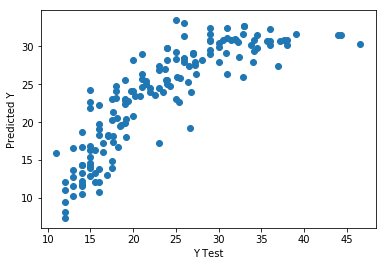

In [23]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Residual Histogram

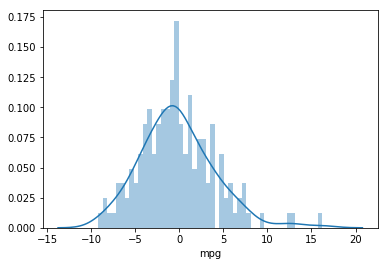

In [24]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics

In [25]:
from sklearn import metrics

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.216359443460045
MSE: 17.60798843592665
RMSE: 4.1961873690204365


### Generating Model Score and comparing predicted values with actual values

In [27]:
model = LinearRegression().fit(X,y)
model.score(X,y)

0.7044815170896751

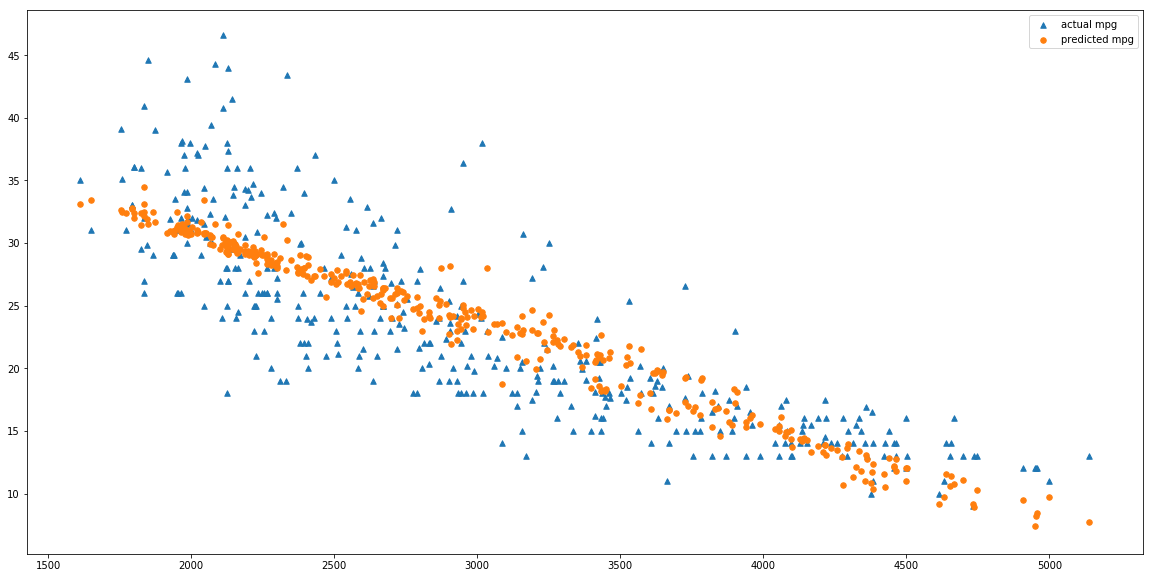

In [28]:
Predicted_Y = X.dot(lm.coef_)+lm.intercept_
plt.figure(figsize=(20,10))
plt.scatter(X['weight'],y,marker='^',s=30,alpha=1.0,label='actual mpg')
plt.scatter(X['weight'],Predicted_Y,marker='o',s=30,alpha=1.0,label='predicted mpg')
plt.legend()
plt.show()

### Generated R^2 values are shown below

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
modelscore = LinearRegression()

In [31]:
scores = cross_val_score(modelscore,X=X,y=y,cv=5,scoring='r2')
scores

array([ 0.46744051,  0.35010097,  0.77118273,  0.67596611, -0.64430695])

## End of Linear Regression